<a href="https://colab.research.google.com/github/PietroDF/Standard_Machine_Learning/blob/master/Semi_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semi-Supervised Learning

Inspiring tutorial @ https://scikit-learn.org/stable/modules/label_propagation.html

## Esempio n.1

In [0]:
print(__doc__)

# Authors: Clay Woolam <clay@woolam.org>
# License: BSD

Automatically created module for IPython interactive environment


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.semi_supervised import LabelSpreading

In [0]:
rng = np.random.RandomState(0)

In [0]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

In [0]:
y_30 = np.copy(y)
y_30[rng.rand(len(y)) < 0.3] = -1
y_50 = np.copy(y)
y_50[rng.rand(len(y)) < 0.5] = -1

In [0]:
y

In [0]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
ls30 = (LabelSpreading().fit(X, y_30), y_30)
ls50 = (LabelSpreading().fit(X, y_50), y_50)
ls100 = (LabelSpreading().fit(X, y), y)


In [0]:
ls30

(LabelSpreading(alpha=0.2, gamma=20, kernel='rbf', max_iter=30, n_jobs=None,
                n_neighbors=7, tol=0.001),
 array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
         0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0,  0,
        -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0,  0,  1,
         1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1,
         1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1,
        -1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  2, -1,
         2,  2, -1,  2,  2,  2, -1,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2, -1,  2,  2, -1,  2,  2, -1, -1,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2]))

In [0]:
rbf_svc = (svm.SVC(kernel='rbf', gamma=.5).fit(X, y), y)

In [0]:
rbf_svc

(SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [0]:
# step size in the mesh
h = .02

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [0]:
xx, yy

(array([[3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
        [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
        [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
        ...,
        [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
        [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
        [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88]]),
 array([[1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
        [1.02, 1.02, 1.02, ..., 1.02, 1.02, 1.02],
        [1.04, 1.04, 1.04, ..., 1.04, 1.04, 1.04],
        ...,
        [5.34, 5.34, 5.34, ..., 5.34, 5.34, 5.34],
        [5.36, 5.36, 5.36, ..., 5.36, 5.36, 5.36],
        [5.38, 5.38, 5.38, ..., 5.38, 5.38, 5.38]]))

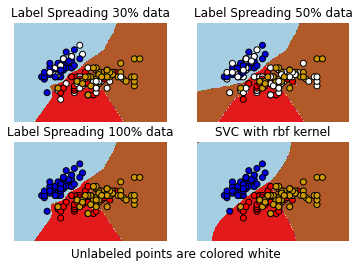

In [0]:
# title for the plots
titles = ['Label Spreading 30% data',
          'Label Spreading 50% data',
          'Label Spreading 100% data',
          'SVC with rbf kernel']

color_map = {-1: (1, 1, 1), 0: (0, 0, .9), 1: (1, 0, 0), 2: (.8, .6, 0)}

for i, (clf, y_train) in enumerate((ls30, ls50, ls100, rbf_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis('off')

    # Plot also the training points
    colors = [color_map[y] for y in y_train]
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='black')

    plt.title(titles[i])
    

plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()

## Esempio n.2

In [0]:
print(__doc__)

# Authors: Clay Woolam <clay@woolam.org>
#          Andreas Mueller <amueller@ais.uni-bonn.de>
# License: BSD

Automatically created module for IPython interactive environment


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.semi_supervised import LabelSpreading
from sklearn.datasets import make_circles

In [0]:
# generate ring with inner box
n_samples = 200
X, y = make_circles(n_samples=n_samples, shuffle=False)
outer, inner = 0, 1
labels = np.full(n_samples, -1.)
labels[0] = outer
labels[-1] = inner

In [0]:
labels

array([ 0., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1

In [0]:
# #############################################################################
# Learn with LabelSpreading
label_spread = LabelSpreading(kernel='knn', alpha=0.8)
label_spread.fit(X, labels)

# #############################################################################

LabelSpreading(alpha=0.8, gamma=20, kernel='knn', max_iter=30, n_jobs=None,
               n_neighbors=7, tol=0.001)

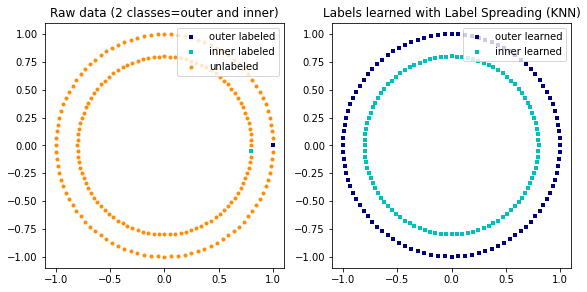

In [0]:

# Plot output labels
output_labels = label_spread.transduction_

plt.figure(figsize=(8.5, 4))

# Subplot 1
plt.subplot(1, 2, 1)

plt.scatter(X[labels == outer, 0], X[labels == outer, 1], color='navy',
            marker='s', lw=0, label="outer labeled", s=10)
plt.scatter(X[labels == inner, 0], X[labels == inner, 1], color='c',
            marker='s', lw=0, label='inner labeled', s=10)
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], color='darkorange',
            marker='.', label='unlabeled')

plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Raw data (2 classes=outer and inner)")

# Subplot 2
plt.subplot(1, 2, 2)

output_label_array = np.asarray(output_labels)
outer_numbers = np.where(output_label_array == outer)[0]
inner_numbers = np.where(output_label_array == inner)[0]

plt.scatter(X[outer_numbers, 0], X[outer_numbers, 1], color='navy',
            marker='s', lw=0, s=10, label="outer learned")
plt.scatter(X[inner_numbers, 0], X[inner_numbers, 1], color='c',
            marker='s', lw=0, s=10, label="inner learned")
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Labels learned with Label Spreading (KNN)")

plt.subplots_adjust(left=0.07, bottom=0.07, right=0.93, top=0.92)

plt.show()

## Esempio n.3

In [0]:
print(__doc__)

# Authors: Clay Woolam <clay@woolam.org>
# License: BSD

Automatically created module for IPython interactive environment


In [0]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

from sklearn import datasets
from sklearn.semi_supervised import LabelSpreading

from sklearn.metrics import confusion_matrix, classification_report

In [0]:
digits = datasets.load_digits()
rng = np.random.RandomState(2)
indices = np.arange(len(digits.data))
rng.shuffle(indices)

X = digits.data[indices[:340]]
y = digits.target[indices[:340]]
images = digits.images[indices[:340]]

n_total_samples = len(y)
n_labeled_points = 40

indices = np.arange(n_total_samples)

unlabeled_set = indices[n_labeled_points:]

In [0]:
# #############################################################################
# Shuffle everything around
y_train = np.copy(y)
y_train[unlabeled_set] = -1

# #############################################################################

In [0]:
y_train

array([ 4,  0,  9,  1,  4,  7,  1,  5,  1,  6,  6,  7,  6,  1,  5,  5,  4,
        6,  2,  7,  4,  6,  4,  1,  5,  2,  9,  5,  4,  6,  5,  6,  3,  4,
        0,  9,  9,  8,  4,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [0]:
# Learn with LabelSpreading
lp_model = LabelSpreading(gamma=.25, max_iter=20)
lp_model.fit(X, y_train)

LabelSpreading(alpha=0.2, gamma=0.25, kernel='rbf', max_iter=20, n_jobs=None,
               n_neighbors=7, tol=0.001)

In [0]:
predicted_labels = lp_model.transduction_[unlabeled_set]
true_labels = y[unlabeled_set]

In [0]:
cm = confusion_matrix(true_labels, predicted_labels, labels=lp_model.classes_)

print("Label Spreading model: %d labeled & %d unlabeled points (%d total)" %
      (n_labeled_points, n_total_samples - n_labeled_points, n_total_samples))

print(classification_report(true_labels, predicted_labels))

print("Confusion matrix")
print(cm)

Label Spreading model: 40 labeled & 300 unlabeled points (340 total)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.82      1.00      0.90        37
           2       1.00      0.86      0.92        28
           3       1.00      0.80      0.89        35
           4       0.92      1.00      0.96        24
           5       0.74      0.94      0.83        34
           6       0.89      0.96      0.92        25
           7       0.94      0.89      0.91        35
           8       1.00      0.68      0.81        31
           9       0.81      0.88      0.84        24

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300

Confusion matrix
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  1 24  0  0  0  2  1  0  0]
 [ 0  0  0 28  0  5  0  1  0  1]
 [ 0  0  0  0 24  0  0 

In [0]:
# Calculate uncertainty values for each transduced distribution
pred_entropies = stats.distributions.entropy(lp_model.label_distributions_.T)

In [0]:
# Pick the top 10 most uncertain labels
uncertainty_index = np.argsort(pred_entropies)[-10:]

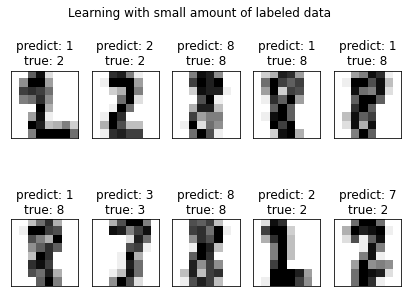

In [0]:
# Plot
f = plt.figure(figsize=(7, 5))
for index, image_index in enumerate(uncertainty_index):
    image = images[image_index]

    sub = f.add_subplot(2, 5, index + 1)
    sub.imshow(image, cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    sub.set_title('predict: %i\ntrue: %i' % (
        lp_model.transduction_[image_index], y[image_index]))

f.suptitle('Learning with small amount of labeled data')
plt.show()

# Mia prova

## Librerie

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Dataset creation

In [0]:
num_elements = 500

In [0]:
mean = [-2, 3]
cov = [[30, 50], [80, 100]]
classe1 = (np.random.multivariate_normal(mean, cov, num_elements), np.ones(num_elements)*1)

mean = [10, 2]
cov = [[170, 100], [300, 20]]
classe2 = (np.random.multivariate_normal(mean, cov, num_elements), np.ones(num_elements)*2)

mean = [-3, -5]
cov = [[40, -15], [-10, 20]]
classe3 = (np.random.multivariate_normal(mean, cov, num_elements), np.ones(num_elements)*3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: covariance is not positive-semidefinite.
  # This is added back by InteractiveShellApp.init_path()


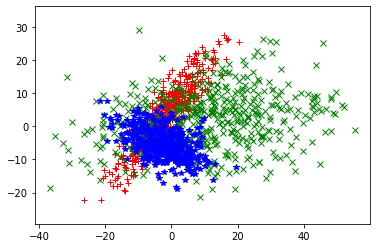

In [0]:
plt.plot(classe1[0][:,0], classe1[0][:,1], 'r+')
plt.plot(classe2[0][:,0], classe2[0][:,1], 'gx')
plt.plot(classe3[0][:,0], classe3[0][:,1], 'b*')
plt.axis('equal')
plt.show()

## Dataset pre-processing

In [0]:
x = np.concatenate((classe1[0],classe2[0],classe3[0]))
y = np.concatenate((classe1[1],classe2[1],classe3[1]))

In [0]:
# Percentuale di etichette da nascondere
unlab_perc = 0.99

# Indici delle etichette da mascherare
unlabel_idx = np.random.rand(len(y)) < unlab_perc

In [0]:
# Creazione delle etichette 'mascherate'
y_unlabeled = np.copy(y)

# Trasformo le etichette in classe 'mascherata'
y_unlabeled[unlabel_idx] = -1

# X corrispondenti alle etichette 'mascherate'
X_test = x[unlabel_idx,:]

In [0]:
y_unlabeled[:10]

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [0]:
# Unione degli array per operare un operazione di shuffle su tutti gli elementi
dataset = np.column_stack((x,y_unlabeled,y,unlabel_idx))

In [0]:
dataset[:10,:]

array([[ -3.68458218,  -4.30013322,  -1.        ,   1.        ,
          1.        ],
       [ -1.15379049,   5.43024007,  -1.        ,   1.        ,
          1.        ],
       [  7.56820515,  16.20519579,  -1.        ,   1.        ,
          1.        ],
       [  1.48018604,  -1.6788346 ,  -1.        ,   1.        ,
          1.        ],
       [-10.77403808, -10.00503715,  -1.        ,   1.        ,
          1.        ],
       [  4.61848528,   7.99948646,  -1.        ,   1.        ,
          1.        ],
       [ -1.07401573,  -3.38725104,  -1.        ,   1.        ,
          1.        ],
       [  2.79095992,   4.74902932,  -1.        ,   1.        ,
          1.        ],
       [  3.75269662,  17.13253286,  -1.        ,   1.        ,
          1.        ],
       [ -3.02066286,  -2.59209015,  -1.        ,   1.        ,
          1.        ]])

In [0]:
# Doppio shuffle del dataset

np.random.shuffle(dataset)
np.random.shuffle(dataset)

In [0]:
dataset[:10,:]

array([[  2.80777576,  -6.47532854,  -1.        ,   3.        ,
          1.        ],
       [ -7.76181735,   5.4592999 ,  -1.        ,   2.        ,
          1.        ],
       [  5.71639885,  -1.73098743,  -1.        ,   2.        ,
          1.        ],
       [  1.41729661,  -8.70722991,  -1.        ,   3.        ,
          1.        ],
       [ -1.93723743,   0.19838316,  -1.        ,   3.        ,
          1.        ],
       [  8.69139809,   6.88372804,  -1.        ,   2.        ,
          1.        ],
       [ -1.06064406,  -5.18135594,  -1.        ,   3.        ,
          1.        ],
       [-21.17885635, -22.14521017,  -1.        ,   1.        ,
          1.        ],
       [ 22.08423568,  12.54525485,  -1.        ,   2.        ,
          1.        ],
       [ -2.00725732,  -4.05574524,  -1.        ,   3.        ,
          1.        ]])

In [0]:
# Separazione degli array shuffleati
X_train = dataset[:,:2]
y_train = dataset[:,2]
y_real = dataset[:,3]
unlabel_idx = [x==1 for x in dataset[:,4]]

In [0]:
X_train[:10,:], y_train[:10]

(array([[  2.80777576,  -6.47532854],
        [ -7.76181735,   5.4592999 ],
        [  5.71639885,  -1.73098743],
        [  1.41729661,  -8.70722991],
        [ -1.93723743,   0.19838316],
        [  8.69139809,   6.88372804],
        [ -1.06064406,  -5.18135594],
        [-21.17885635, -22.14521017],
        [ 22.08423568,  12.54525485],
        [ -2.00725732,  -4.05574524]]),
 array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]))

## Modelli semi-supervised

In [0]:
kernel_param = 'rbf' # 'rbf' or 'knn'
gamma_param = 0.25 # 0.25

### Label Spreading

In [0]:
# Learn with LabelSpreading
lsp_model = LabelSpreading(kernel=kernel_param,gamma=gamma_param, max_iter=20)

In [0]:
# Fit del modello
lsp_model.fit(X_train, y_train)

LabelSpreading(alpha=0.2, gamma=0.25, kernel='rbf', max_iter=20, n_jobs=None,
               n_neighbors=7, tol=0.001)

In [0]:
# Estensione delle etichette
lsp_predicted_labels = lsp_model.transduction_[unlabel_idx]
true_labels = y_real[unlabel_idx]

In [0]:
true_labels[:10], ' ', lsp_predicted_labels[:10]

(array([3., 2., 2., 3., 3., 2., 3., 1., 2., 3.]),
 ' ',
 array([3., 1., 3., 3., 1., 1., 3., 3., 2., 3.]))

### Label Propagation

In [0]:
# Learn with LabelSpreading
lpr_model = LabelPropagation(kernel=kernel_param,gamma=gamma_param, max_iter=20)

In [0]:
# Fit del modello
lpr_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/semi_supervised/_label_propagation.py:288: ConvergenceWarning: max_iter=20 was reached without convergence.
  category=ConvergenceWarning


LabelPropagation(gamma=0.25, kernel='rbf', max_iter=20, n_jobs=None,
                 n_neighbors=7, tol=0.001)

In [0]:
# Estensione delle etichette
lpr_predicted_labels = lpr_model.transduction_[unlabel_idx]
true_labels = y_real[unlabel_idx]

## Performance

In [0]:
lsp_semisup_acc = accuracy_score(true_labels, lsp_predicted_labels)
lpr_semisup_acc = accuracy_score(true_labels, lpr_predicted_labels)

In [0]:
lsp_semisup_acc,lpr_semisup_acc

(0.6872898453261601, 0.6590450571620713)

In [0]:
print(confusion_matrix(true_labels, lsp_predicted_labels))
print(classification_report(true_labels, lsp_predicted_labels))

[[433   1  62]
 [150 216 130]
 [121   1 373]]
              precision    recall  f1-score   support

         1.0       0.62      0.87      0.72       496
         2.0       0.99      0.44      0.61       496
         3.0       0.66      0.75      0.70       495

    accuracy                           0.69      1487
   macro avg       0.76      0.69      0.68      1487
weighted avg       0.76      0.69      0.68      1487



In [0]:
print(confusion_matrix(true_labels, lpr_predicted_labels))
print(classification_report(true_labels, lpr_predicted_labels))

[[475   0  21]
 [194 189 113]
 [178   1 316]]
              precision    recall  f1-score   support

         1.0       0.56      0.96      0.71       496
         2.0       0.99      0.38      0.55       496
         3.0       0.70      0.64      0.67       495

    accuracy                           0.66      1487
   macro avg       0.75      0.66      0.64      1487
weighted avg       0.75      0.66      0.64      1487



## Plot delle propagazioni

In [0]:
unlabeled_dataset = np.column_stack((X_train[unlabel_idx,:], lsp_predicted_labels, lpr_predicted_labels, true_labels))

In [0]:
lsp_pred_xy_1 = unlabeled_dataset[unlabeled_dataset[:,2]==1,:2]
lsp_pred_xy_2 = unlabeled_dataset[unlabeled_dataset[:,2]==2,:2]
lsp_pred_xy_3 = unlabeled_dataset[unlabeled_dataset[:,2]==3,:2]

lpr_pred_xy_1 = unlabeled_dataset[unlabeled_dataset[:,3]==1,:2]
lpr_pred_xy_2 = unlabeled_dataset[unlabeled_dataset[:,3]==2,:2]
lpr_pred_xy_3 = unlabeled_dataset[unlabeled_dataset[:,3]==3,:2]

true_xy_1 = unlabeled_dataset[unlabeled_dataset[:,4]==1,:2]
true_xy_2 = unlabeled_dataset[unlabeled_dataset[:,4]==2,:2]
true_xy_3 = unlabeled_dataset[unlabeled_dataset[:,4]==3,:2]

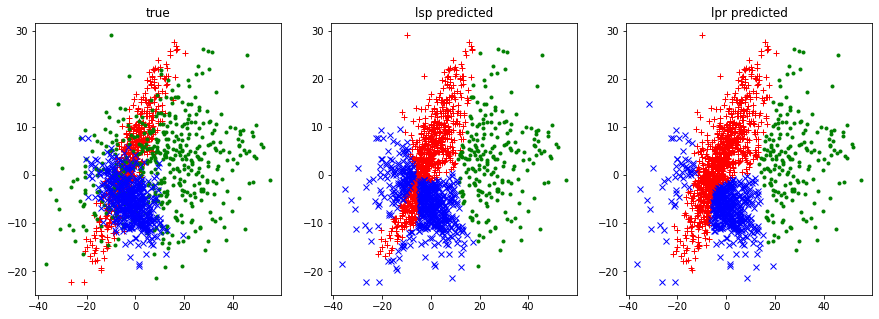

In [0]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(true_xy_1[:,0],true_xy_1[:,1],'r+')
plt.plot(true_xy_2[:,0],true_xy_2[:,1],'g.')
plt.plot(true_xy_3[:,0],true_xy_3[:,1],'bx')
plt.title('true')

plt.subplot(1,3,2)
plt.plot(lsp_pred_xy_1[:,0],lsp_pred_xy_1[:,1],'r+')
plt.plot(lsp_pred_xy_2[:,0],lsp_pred_xy_2[:,1],'g.')
plt.plot(lsp_pred_xy_3[:,0],lsp_pred_xy_3[:,1],'bx')
plt.title('lsp predicted')

plt.subplot(1,3,3)
plt.plot(lpr_pred_xy_1[:,0],lpr_pred_xy_1[:,1],'r+')
plt.plot(lpr_pred_xy_2[:,0],lpr_pred_xy_2[:,1],'g.')
plt.plot(lpr_pred_xy_3[:,0],lpr_pred_xy_3[:,1],'bx')
plt.title('lpr predicted')

plt.show()

## Modello trainato solo su dati labeled

In [0]:
label_idx = [not x for x in unlabel_idx]

In [0]:
labeled_x = X_train[label_idx,:]
labeled_y = y_real[label_idx]

unlabeled_x = X_train[unlabel_idx,:]
unlabeled_y = y_real[unlabel_idx]

In [0]:
from sklearn import svm

In [0]:
clf = svm.SVC()

In [0]:
clf.fit(labeled_x, labeled_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
unlabeled_predicted = clf.predict(unlabeled_x)

In [0]:
model_sup_acc = accuracy_score(unlabeled_y,unlabeled_predicted)

In [0]:
print(confusion_matrix(unlabeled_y, unlabeled_predicted))
print(classification_report(unlabeled_y, unlabeled_predicted))

[[376   0 120]
 [212 189  95]
 [140   1 354]]
              precision    recall  f1-score   support

         1.0       0.52      0.76      0.61       496
         2.0       0.99      0.38      0.55       496
         3.0       0.62      0.72      0.67       495

    accuracy                           0.62      1487
   macro avg       0.71      0.62      0.61      1487
weighted avg       0.71      0.62      0.61      1487



In [0]:
supervised_dataset = np.column_stack((unlabeled_x,unlabeled_predicted,true_labels))

In [0]:
sup_pred_xy_1 = supervised_dataset[supervised_dataset[:,2]==1,:2]
sup_pred_xy_2 = supervised_dataset[supervised_dataset[:,2]==2,:2]
sup_pred_xy_3 = supervised_dataset[supervised_dataset[:,2]==3,:2]

sup_true_xy_1 = supervised_dataset[supervised_dataset[:,3]==1,:2]
sup_true_xy_2 = supervised_dataset[supervised_dataset[:,3]==2,:2]
sup_true_xy_3 = supervised_dataset[supervised_dataset[:,3]==3,:2]

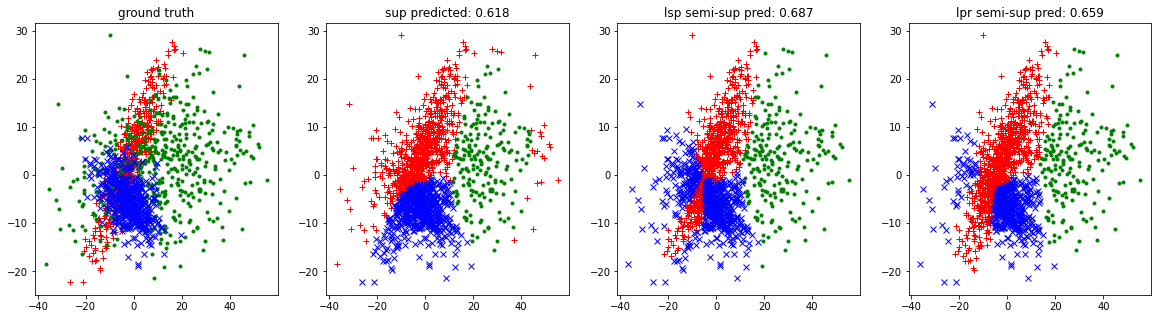

In [0]:
fig = plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.plot(true_xy_1[:,0],true_xy_1[:,1],'r+')
plt.plot(true_xy_2[:,0],true_xy_2[:,1],'g.')
plt.plot(true_xy_3[:,0],true_xy_3[:,1],'bx')
plt.title('ground truth')

plt.subplot(1,4,2)
plt.plot(sup_pred_xy_1[:,0],sup_pred_xy_1[:,1],'r+')
plt.plot(sup_pred_xy_2[:,0],sup_pred_xy_2[:,1],'g.')
plt.plot(sup_pred_xy_3[:,0],sup_pred_xy_3[:,1],'bx')
plt.title('sup predicted: '+str(np.round(model_sup_acc,3)))

plt.subplot(1,4,3)
plt.plot(lsp_pred_xy_1[:,0],lsp_pred_xy_1[:,1],'r+')
plt.plot(lsp_pred_xy_2[:,0],lsp_pred_xy_2[:,1],'g.')
plt.plot(lsp_pred_xy_3[:,0],lsp_pred_xy_3[:,1],'bx')
plt.title('lsp semi-sup pred: '+str(np.round(lsp_semisup_acc,3)))

plt.subplot(1,4,4)
plt.plot(lpr_pred_xy_1[:,0],lpr_pred_xy_1[:,1],'r+')
plt.plot(lpr_pred_xy_2[:,0],lpr_pred_xy_2[:,1],'g.')
plt.plot(lpr_pred_xy_3[:,0],lpr_pred_xy_3[:,1],'bx')
plt.title('lpr semi-sup pred: '+str(np.round(lpr_semisup_acc,3)))

plt.show()